In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Загрузка датасетов


In [18]:
df_fraud = pd.read_csv('creditcard.csv')

df_fraud = df_fraud.sample(n=10000, random_state=42)


In [19]:
df_crop = pd.read_csv('crop_yield.csv')

df_crop = df_crop.sample(n=10000, random_state=42)
yr = df_crop['Yield_tons_per_hectare']

Графики классификация

гипотеза классы сильно несбалансированы, поэтому стандартная Accuracy может быть обманчива. Нужно использовать F1 и recall

Реализации KNN регрессор

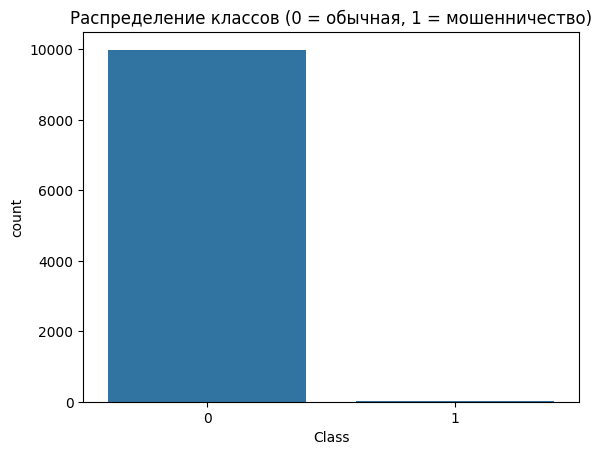

Class
0    0.9984
1    0.0016
Name: proportion, dtype: float64


In [20]:
sns.countplot(x='Class', data=df_fraud)
plt.title('Распределение классов (0 = обычная, 1 = мошенничество)')
plt.show()

print(df_fraud['Class'].value_counts(normalize=True))

гипотеза признаки могут иметь разные распределения для мошеннических транзакций. Это помогает понять, какие признаки информативные и могут быть выделены или преобразованы

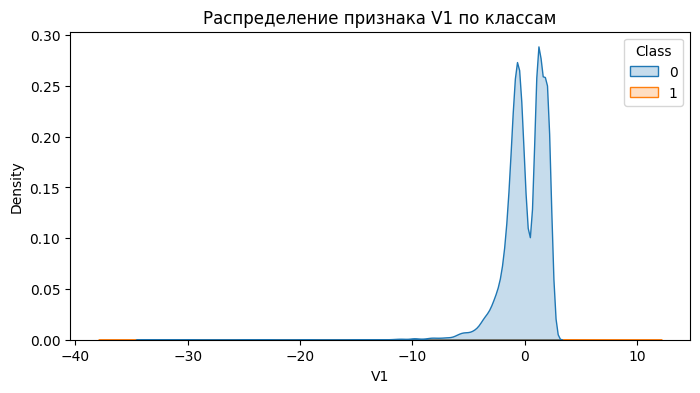

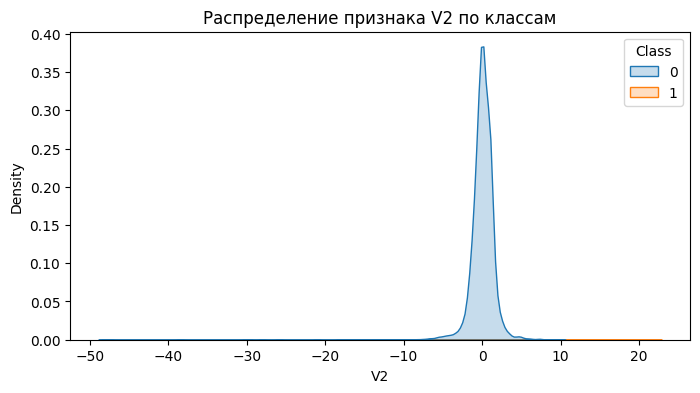

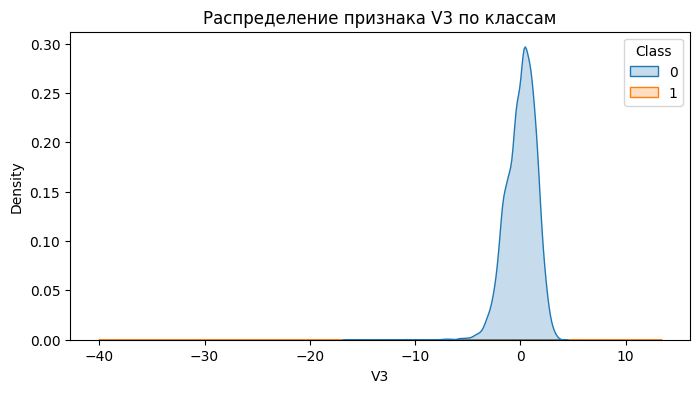

In [21]:
features = ['V1', 'V2', 'V3']

for feat in features:
    plt.figure(figsize=(8,4))
    sns.kdeplot(data=df_fraud, x=feat, hue='Class', fill=True)
    plt.title(f'Распределение признака {feat} по классам')
    plt.show()

гипотеза сильно коррелированные признаки можно объединять, или исключить из модели, чтобы уменьшить шум и переобучение

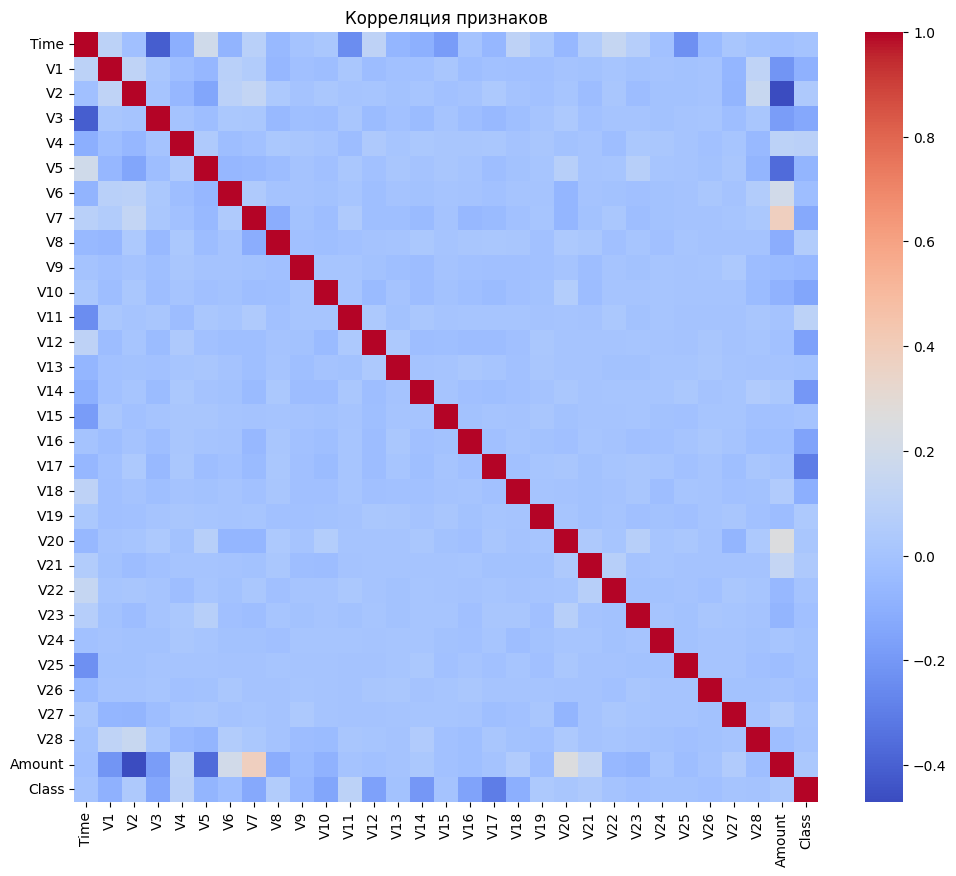

In [22]:
plt.figure(figsize=(12,10))
sns.heatmap(df_fraud.corr(), cmap='coolwarm', fmt=".2f")
plt.title('Корреляция признаков')
plt.show()

гипотеза время суток или период может быть информативным

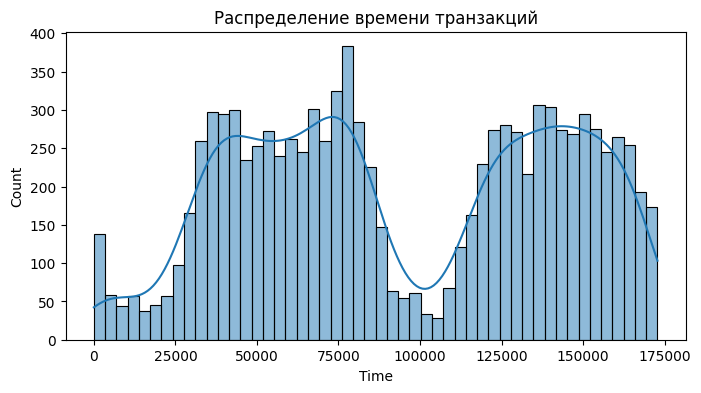

In [23]:
plt.figure(figsize=(8,4))
sns.histplot(df_fraud['Time'], bins=50, kde=True)
plt.title('Распределение времени транзакций')
plt.show()

Графики регрессия

Посмотрим вцелом на распределение урожайности

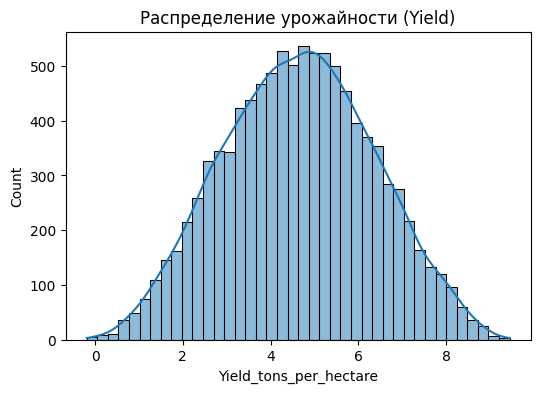

In [24]:
plt.figure(figsize=(6,4))
sns.histplot(yr, bins=40, kde=True)
plt.title("Распределение урожайности (Yield)")
plt.show()

Корреляция

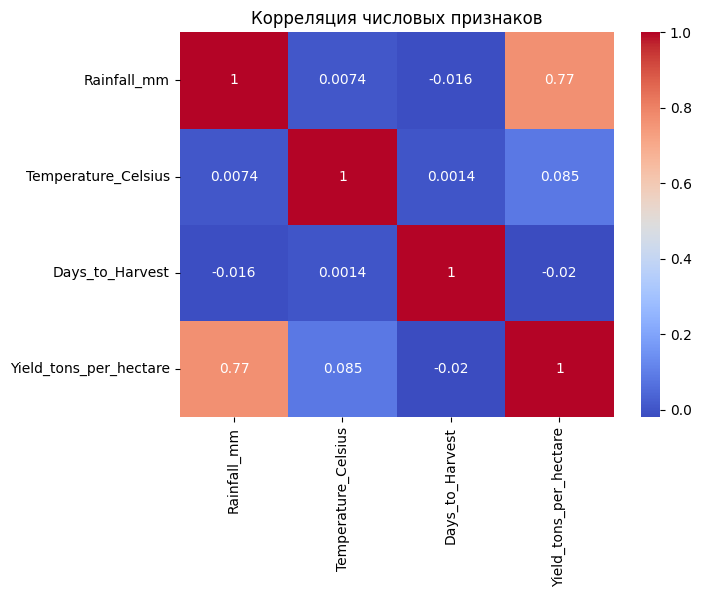

In [27]:
numeric_cols = ['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest']

plt.figure(figsize=(7,5))
sns.heatmap(df_crop[numeric_cols + ['Yield_tons_per_hectare']].corr(), annot=True, cmap='coolwarm')
plt.title("Корреляция числовых признаков")
plt.show()

вид данных

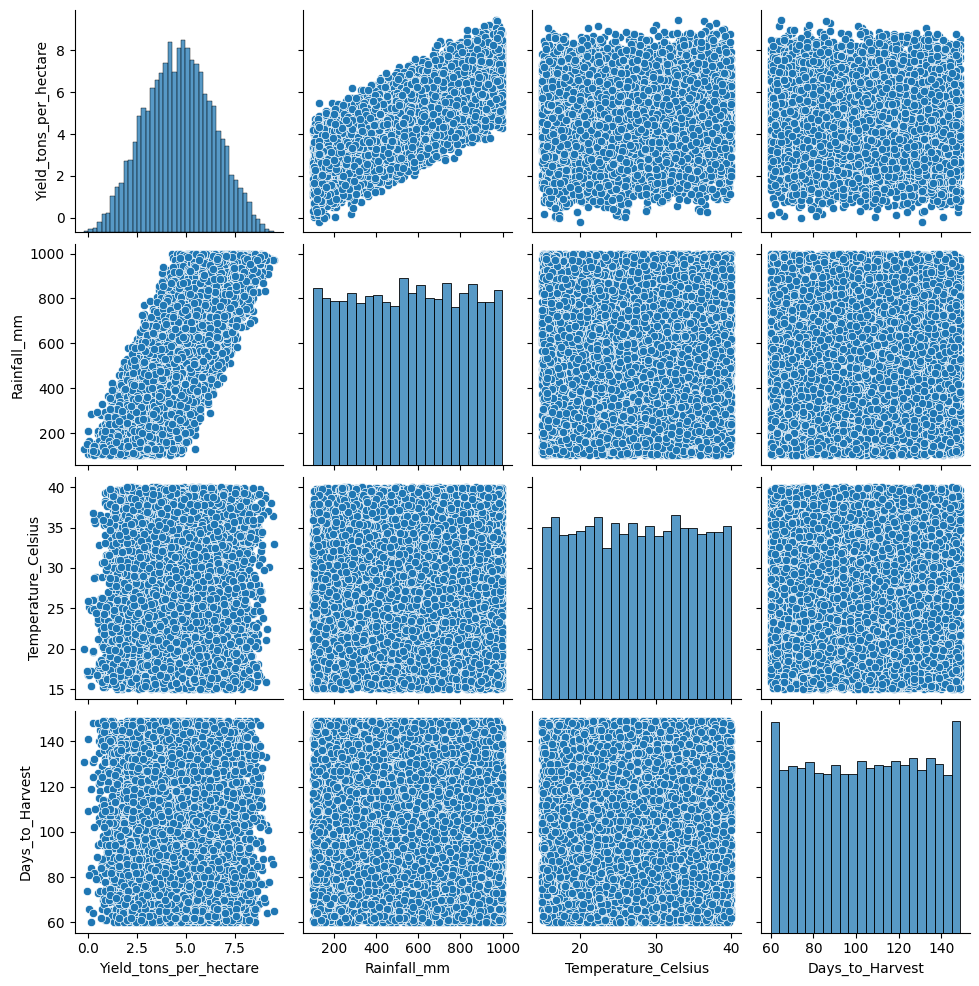

In [25]:
sns.pairplot(df_crop[['Yield_tons_per_hectare', 'Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest']])
plt.show()